# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [9]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


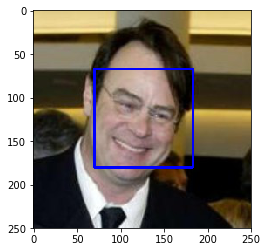

In [10]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [74]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?
- What percentage of the first 100 images in `dog_files` have a detected human face?
<br>Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)
<br>
<br>
_I tested multiple haarcascade filters. The best performing had 100% detection in the first 100 images. The worst performing had 57%._
<br>
<br>
_On the various haarcascade filters I tested, the detection of human faces in the dog images ranged from 2% to 60%. I wrote a short block of code to annotate a few images that had detected both dogs and humans, so it is easy to see why this was occuring. There are indeed images with both dogs and humans in them._
<br>
<br>

In [6]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

global human_face, dog_face, human_face_counter, dog_face_counter, dog_and_human

def haar_tester():
    
    human_face_counter = 0
    dog_face_counter = 0
    dog_and_human = []
    
    for i in tqdm(range(len(human_files_short))):
        human_face = face_detector(human_files_short[i])
        dog_face = face_detector(dog_files_short[i])
        human_face_counter += human_face
        dog_face_counter += dog_face

        if dog_face == True:
            dog_and_human.append(i)
    
    print("Human Imgs Face Detection %age: \t{:.3f}".format(human_face_counter / 100))
    print("Dog Imgs Face Detection %age: \t{:.3f}".format(dog_face_counter / 100))
    print("Ten entries from dog_and_human: {}".format(dog_and_human[:10]))
    
    dog_and_human = []

frontalface_alt = haar_tester()

100%|██████████| 100/100 [00:31<00:00,  3.18it/s]

Human Imgs Face Detection %age: 	0.980
Dog Imgs Face Detection %age: 	0.170
Ten entries from dog_and_human: [26, 27, 39, 40, 42, 49, 56, 58, 59, 71]


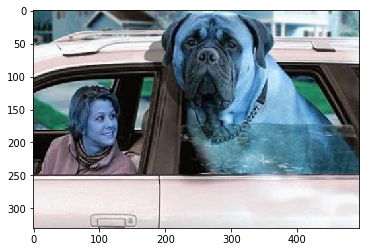

In [7]:
img = cv2.imread(dog_files_short[27])
plt.imshow(img)
plt.show()

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
import os
os.listdir('haarcascades/')

['haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_frontalface_alt.xml']

In [8]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt2.xml')
frontalface_alt2 = haar_tester()

100%|██████████| 100/100 [00:31<00:00,  3.18it/s]

Human Imgs Face Detection %age: 	1.000
Dog Imgs Face Detection %age: 	0.210
Ten entries from dog_and_human: [13, 27, 36, 39, 40, 42, 51, 56, 59, 63]


In [9]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt_tree.xml')
frontalface_alt_tree = haar_tester()

100%|██████████| 100/100 [00:21<00:00,  8.47it/s]

Human Imgs Face Detection %age: 	0.570
Dog Imgs Face Detection %age: 	0.020
Ten entries from dog_and_human: [39, 56]


In [10]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
frontalface_default = haar_tester()

100%|██████████| 100/100 [00:28<00:00,  3.57it/s]

Human Imgs Face Detection %age: 	1.000
Dog Imgs Face Detection %age: 	0.600
Ten entries from dog_and_human: [3, 6, 8, 9, 10, 11, 12, 13, 17, 21]


---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [14]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 96972655.25it/s] 


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [15]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    Args:
        img_path: path to an image
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = Image.open(img_path)

    transform = transforms.Compose([transforms.Resize((256,256)),
                                    transforms.CenterCrop(224),
                                    transforms.RandomRotation(35),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.485,0.456,0.406),
                                                        (0.229,0.224,0.225))])

    image_tensor = transform(img)
    image_tensor = image_tensor.unsqueeze(0)

    if torch.cuda.is_available():
        image_tensor = image_tensor.cuda()

    prediction = VGG16(image_tensor)
    prediction = prediction.cpu()

    predicted_class_index = prediction.data.numpy().argmax()

    return predicted_class_index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predicted_class_index = VGG16_predict(img_path)

    if predicted_class_index >= 151 and predicted_class_index <= 268:
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?

- What percentage of the images in `dog_files_short` have a detected dog?


__Answer:__ 
<br>
<br>
Dogs detected in **human_files_short**: &emsp;n=50 :: 0.000&emsp;&emsp;n=500 :: 0.012&emsp;&emsp;n=5,000 :: 0.003
<br>
<br>
Dogs detected in **dog_files_short**:&emsp;&emsp;&emsp;n=50 :: 0.960&emsp;&emsp;n=500 :: 0.920&emsp;&emsp;n=5,000 :: 0.935

In [25]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
test_cases = 50
dog_counter = []
human_counter = []

for i in range(test_cases):
    dog_detected = dog_detector(dog_files[i])
    if dog_detected == True:
        dog_counter.append(1)
    else:
        dog_counter.append(0)
    human_detected = dog_detector(human_files[i])
    if human_detected == True:
        human_counter.append(1)
    else:
        human_counter.append(0)

result_dog = np.asarray(dog_counter)
result_human = np.asarray(human_counter)
print("{:.3f} Dog Detection for {} dog images".format(result_dog.sum() / len(result_dog), len(result_dog)))
print("{:.3f} Dog Detection for {} human images".format(result_human.sum() / len(result_human), len(result_human)))

0.960 Dog Detection for 50 dog images
0.000 Dog Detection for 50 human images


In [26]:
test_cases = 500
dog_counter = []
human_counter = []

for i in range(test_cases):
    dog_detected = dog_detector(dog_files[i])
    if dog_detected == True:
        dog_counter.append(1)
    else:
        dog_counter.append(0)
    human_detected = dog_detector(human_files[i])
    if human_detected == True:
        human_counter.append(1)
    else:
        human_counter.append(0)

result_dog = np.asarray(dog_counter)
result_human = np.asarray(human_counter)
print("{:.3f} Dog Detection for {} dog images".format(result_dog.sum() / len(result_dog), len(result_dog)))
print("{:.3f} Dog Detection for {} human images".format(result_human.sum() / len(result_human), len(result_human)))

0.920 Dog Detection for 500 dog images
0.012 Dog Detection for 500 human images


In [27]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

test_cases = 5000
dog_counter = []
human_counter = []

for i in range(test_cases):
    dog_detected = dog_detector(dog_files[i])
    if dog_detected == True:
        dog_counter.append(1)
    else:
        dog_counter.append(0)
    human_detected = dog_detector(human_files[i])
    if human_detected == True:
        human_counter.append(1)
    else:
        human_counter.append(0)

result_dog = np.asarray(dog_counter)
result_human = np.asarray(human_counter)
print("{:.3f} Dog Detection for {} dog images".format(result_dog.sum() / len(result_dog), len(result_dog)))
print("{:.3f} Dog Detection for {} human images".format(result_human.sum() / len(result_human), len(result_human)))

0.935 Dog Detection for 5000 dog images
0.003 Dog Detection for 5000 human images


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [221]:
import numpy as np
import pandas as pd
import os
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image
from glob import glob
from torch.utils.data import Dataset

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

myResize         = transforms.Resize((255,255))
myCenterCrop     = transforms.CenterCrop(224)
myRandomRotation = transforms.RandomRotation(35)
myToTensor       = transforms.ToTensor()
myNormalize      = transforms.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225))

transform_train = transforms.Compose([myResize, 
                                      myCenterCrop, 
                                      myRandomRotation, 
                                      myToTensor, 
                                      myNormalize])

transform_valid = transforms.Compose([myResize, 
                                      myCenterCrop,
                                      # myRandomRotation,
                                      myToTensor, 
                                      myNormalize])

transform_test  = transforms.Compose([myResize, 
                                      myCenterCrop,
                                      # myRandomRotation,
                                      myToTensor, 
                                      myNormalize])

train_data = datasets.ImageFolder("/data/dog_images/train/", transform=transform_train)
valid_data = datasets.ImageFolder("/data/dog_images/valid/", transform=transform_valid)
test_data = datasets.ImageFolder("/data/dog_images/test/", transform=transform_test)

batch_size = 32

loader = {'train' : DataLoader(train_data, batch_size=32, num_workers=0, shuffle=True),
          'valid' : DataLoader(valid_data, batch_size=32, num_workers=0, shuffle=False),
          'test'  : DataLoader(test_data, batch_size=32, num_workers=0, shuffle=False)}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?<br>
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?
<br>


**Answer**:<br><br>_My transforms resize the images to (n,3,224,224) using a resize to (255,255) followed by a center crop of 224. I selected the input tensor size of (n,3,224,224) because this was the same size that AlexNet had used, and the rationale is because the center cropping helps to create random patches and increase translation invariance--that is, if an input image is awkward, rotated, crooked, etc., then this will not be a problem for our CNN. I retained all three color channels instead of mapping to Grayscale because a lot of information about a dogs breed I think can be found in the colors of their fur. Lastly, I normalized the RGB channels to center the data and improve computation speed. The values I selected for mean and std were standardized values commonly used in the ImageNet dataset._
<br>
<br>
_As for data augmentation, I performed a random rotate of 35 degrees. Again, this was to help increase translational invariance for images that would eventually be showing dogs which were not 'square' with the rest of the image composition._
<br>
<br>

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [217]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        self.conv1_1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv1_2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv1_3 = nn.Conv2d(64, 64, 3, stride=1, padding=1)
        
        self.maxPool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.25)
        
        self.fc_1 = nn.Linear(3136,1028)
        self.fc_2 = nn.Linear(1028,512)
        self.fc_3 = nn.Linear(512,134)
    
    def forward(self, x):
        #print("Before conv1_1: {}".format(x.shape))
        #print("Before conv1_1: {}".format(type(x)))
        x = F.relu(self.conv1_1(x))
        x = self.maxPool(x)
        x = F.relu(self.conv1_2(x))
        x = self.maxPool(x)
        x = F.relu(self.conv1_3(x))
        x = self.maxPool(x)
        x = x.view(x.shape[0], -1)
        x = self.dropout(x)
        x = F.relu(self.fc_1(x))
        x = self.dropout(x)
        x = F.relu(self.fc_2(x))
        x = self.dropout(x)
        x = self.fc_3(x)

        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model = Net()

# move tensors to GPU if CUDA is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__
<br>
<br>
_I had to go through multiple iterations of tweaking model architecture as well as optimizer learning rates because I was having issues with the training loss and validation loss not declining. While I adjusting, I continually reduced the model complexity to increase training time so each adjustment would not take as long. Eventually I realized that it was my Optimizer that wasn't working properly. I switched from the Adam algorithm (multiple learn rates) over to regular SGD with learn rate of 0.05. I continued to train the model until I noticed that the training loss was declining but the validation loss was not. This indicated to me that my architecture was begininng to memorize the training data and it was starting to overfit.
<br>
<br>
If I were to perform this exercise again, I would not include dropout off the hop. I would begin with an incredibly simple architecture and then slowly increase complexity. This would ensure that the model is not over engineered, and I would not use so much time attempting to trouble shooting issues with training when there are so many hyper parameters to consider._
<br>
<br>

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [10]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [216]:
def train(n_epochs, loader, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()

        for batch_idx, (data, target) in enumerate(loader['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            ## Zero out the gradients from previous loop
            optimizer.zero_grad()
            
            ## find the loss and update the model parameters accordingly
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        
        for batch_idx, (data, target) in enumerate(loader['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            output = model(data)
            loss = criterion(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss    
    
    # return trained model
    return model


In [12]:
n_epochs = 10
loader = loader
model_scratch_v7_external = Net()
model_scratch_v7_external.cuda()
optimizer = optim.SGD(model_scratch_v7_external.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()
use_cuda = torch.cuda.is_available()
save_path = 'model_scratch_v7_external.pt'

# train the model
model_scratch_v7external = train(n_epochs, loader, model_scratch_v7_external, optimizer, criterion, use_cuda, save_path)

# load the model that got the best validation accuracy
model_scratch_v7external.load_state_dict(torch.load('model_scratch_v7_external.pt'))

Epoch 1, Batch 1 loss: 4.889203
Epoch 1, Batch 101 loss: 4.896915
Epoch 1, Batch 201 loss: 4.893089
Epoch: 1 	Training Loss: 4.892188 	Validation Loss: 4.880194
Validation loss decreased (inf --> 4.880194).  Saving model ...
Epoch 2, Batch 1 loss: 4.861729
Epoch 2, Batch 101 loss: 4.871027
Epoch 2, Batch 201 loss: 4.856037
Epoch: 2 	Training Loss: 4.855482 	Validation Loss: 4.787361
Validation loss decreased (4.880194 --> 4.787361).  Saving model ...
Epoch 3, Batch 1 loss: 4.922541
Epoch 3, Batch 101 loss: 4.722284
Epoch 3, Batch 201 loss: 4.697022
Epoch: 3 	Training Loss: 4.696141 	Validation Loss: 4.663710
Validation loss decreased (4.787361 --> 4.663710).  Saving model ...
Epoch 4, Batch 1 loss: 4.491433
Epoch 4, Batch 101 loss: 4.601518
Epoch 4, Batch 201 loss: 4.595734
Epoch: 4 	Training Loss: 4.597223 	Validation Loss: 4.637554
Validation loss decreased (4.663710 --> 4.637554).  Saving model ...
Epoch 5, Batch 1 loss: 4.621599
Epoch 5, Batch 101 loss: 4.531295
Epoch 5, Batch 201 

In [15]:
model_scratch_v7external.load_state_dict(torch.load('model_scratch_v7_external.pt'))
n_epochs = 10
loader = loader
model_scratch_v7_external.cuda()
optimizer = optim.SGD(model_scratch_v7_external.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss()
use_cuda = torch.cuda.is_available()
save_path = 'model_scratch_v7_external.pt'
model_scratch_v7external = train(n_epochs, loader, model_scratch_v7_external, optimizer, criterion, use_cuda, save_path)

Epoch 1, Batch 1 loss: 3.125050
Epoch 1, Batch 101 loss: 3.367632
Epoch 1, Batch 201 loss: 3.390100
Epoch: 1 	Training Loss: 3.392327 	Validation Loss: 3.768864
Validation loss decreased (inf --> 3.768864).  Saving model ...
Epoch 2, Batch 1 loss: 2.974991
Epoch 2, Batch 101 loss: 3.245024
Epoch 2, Batch 201 loss: 3.283947
Epoch: 2 	Training Loss: 3.286806 	Validation Loss: 3.879339
Epoch 3, Batch 1 loss: 2.804753
Epoch 3, Batch 101 loss: 3.160435
Epoch 3, Batch 201 loss: 3.210182
Epoch: 3 	Training Loss: 3.209980 	Validation Loss: 3.865265
Epoch 4, Batch 1 loss: 3.021300
Epoch 4, Batch 101 loss: 3.109015
Epoch 4, Batch 201 loss: 3.133828
Epoch: 4 	Training Loss: 3.134874 	Validation Loss: 3.824402
Epoch 5, Batch 1 loss: 2.904442
Epoch 5, Batch 101 loss: 3.027142
Epoch 5, Batch 201 loss: 3.047149
Epoch: 5 	Training Loss: 3.044169 	Validation Loss: 3.927397
Epoch 6, Batch 1 loss: 2.431318
Epoch 6, Batch 101 loss: 2.877646
Epoch 6, Batch 201 loss: 2.934810
Epoch: 6 	Training Loss: 2.9426

In [219]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    mini_counter = 0
    
    for data, target in loaders['test']:
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
            
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        #test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1] # tensor shape [16,1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        #print("correct: {}".format(correct))
        total += data.size(0)
        #print("total: {}".format(total))
        
        test_loss += loss.item()*data.size(0)
        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [227]:
# call test function
criterion = nn.CrossEntropyLoss()
use_cuda = torch.cuda.is_available()
model_load = Net()
model_load.load_state_dict(torch.load('model_scratch_v7_external.pt'))
model_load.eval()
model_load.cuda()
test(loader, model_load, criterion, use_cuda)

Test Loss: 3145.942822


Test Accuracy: 11% (94/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [3]:
## TODO: Specify data loaders
import numpy as np
import pandas as pd
import os
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from PIL import Image
from glob import glob
from torch.utils.data import Dataset

myResize         = transforms.Resize((255,255))
myCenterCrop     = transforms.CenterCrop(224)
myRandomRotation = transforms.RandomRotation(35)
myToTensor       = transforms.ToTensor()
myNormalize      = transforms.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225))

transform_train = transforms.Compose([myResize, 
                                      myCenterCrop, 
                                      myRandomRotation, 
                                      myToTensor, 
                                      myNormalize])

transform_valid = transforms.Compose([myResize, 
                                      myCenterCrop,
                                      # myRandomRotation,
                                      myToTensor, 
                                      myNormalize])

transform_test  = transforms.Compose([myResize, 
                                      myCenterCrop,
                                      # myRandomRotation,
                                      myToTensor, 
                                      myNormalize])

train_data = datasets.ImageFolder("/data/dog_images/train/", transform=transform_train)
valid_data = datasets.ImageFolder("/data/dog_images/valid/", transform=transform_valid)
test_data = datasets.ImageFolder("/data/dog_images/test/", transform=transform_test)

batch_size = 32

loader_transfer = {'train' : DataLoader(train_data, batch_size=32, num_workers=0, shuffle=True),
                   'valid' : DataLoader(valid_data, batch_size=32, num_workers=0, shuffle=False),
                   'test'  : DataLoader(test_data, batch_size=32, num_workers=0, shuffle=False)}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [16]:
import torchvision
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg11(pretrained=True)

model_transfer.cuda()
    
model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [17]:
# Freeze weights in convolutional portion of model_transfer

for params in model_transfer.features.parameters():
    params.requires_grad = False

In [18]:
model_transfer.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [19]:
# Modify classifier layers from 1000 features to 133

myClassifier_seq = nn.Sequential(nn.Linear(25088, 4096, bias=True),
                                nn.ReLU(inplace=True),
                                nn.Dropout(p=0.5),
                                nn.Linear(4096,4096, bias=True),
                                nn.Dropout(p=0.5),
                                nn.ReLU(inplace=True),
                                nn.Linear(4096,133, bias=True))

myClassifier_seq

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): Dropout(p=0.5)
  (5): ReLU(inplace)
  (6): Linear(in_features=4096, out_features=133, bias=True)
)

In [21]:
# Replace model_transfer.classifier with myClassifier_seq

model_transfer.classifier = myClassifier_seq

for params in model_transfer.classifier.parameters():
    params.requires_grade = True

model_transfer

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
<br>
<br>
1. _As the base model selection I went with pre-trained VGG 11. I selected VGG 11 because it was one of the smallest models on the pre-trained list, but it still showed some pretty good accuracy on ImageNet. I thought this would be suitable because if VGG 11 was able to perform on ImageNet with 1000 classifications, then dog breeds at 133 classifications should have been no problem._
2. _I wanted to see how the generalization of the CNN portion of VGG 11 performed without tinkering with their architecture too much, so I froze the parameters in the features portion of the model but left the classifier with requires_grade = True. To re-train the classifier, all I did was adjust the dimensions in the output layer from 1000 categories to 133._
3. _I trained the new classifier for as long as I needed to until I saw a divergence from improvements between the test set and the validation set. Once the train set started to show improvements, but the validation set was not going any lower, I stopped training. This was the signal to me that the model was beginning to memorize the training set._
4. _The network achieved 61% test accuracy, which was slightly above the minimum requirement. I was very pleased with this result considering my rationale along each step was geared towards a pragmatic approach of doing only what was required to complete the task. I aimed to use minimum amount of time and resources for this portion of the project, and it seems to ahve worked._

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [61]:
import torch.optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(model_transfer.classifier.parameters(), lr=0.05)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [63]:
# From earlier:
# train(n_epochs, loader, model, optimizer, criterion, use_cuda, save_path)

# train the model

n_epochs = 25
loader_transfer = loader_transfer
#model_transfer
model_transfer.cuda()
optimizer_transfer = torch.optim.SGD(model_transfer.classifier.parameters(), lr=0.05)
criterion_transfer = nn.CrossEntropyLoss()
use_cuda = torch.cuda.is_available()
save_path_transfer = 'model_transfer.pt'

# train the model
model_transfer = train(n_epochs, 
                       loader_transfer, 
                       model_transfer, 
                       optimizer_transfer, 
                       criterion_transfer, 
                       use_cuda, 
                       save_path_transfer)

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load(save_path_transfer))

Epoch 1, Batch 1 loss: 2.454288
Epoch 1, Batch 101 loss: 2.327283
Epoch 1, Batch 201 loss: 2.273629
Epoch: 1 	Training Loss: 2.269288 	Validation Loss: 1.721098
Validation loss decreased (inf --> 1.721098).  Saving model ...
Epoch 2, Batch 1 loss: 1.823840
Epoch 2, Batch 101 loss: 1.937804
Epoch 2, Batch 201 loss: 1.933953
Epoch: 2 	Training Loss: 1.932123 	Validation Loss: 1.389490
Validation loss decreased (1.721098 --> 1.389490).  Saving model ...
Epoch 3, Batch 1 loss: 1.667026
Epoch 3, Batch 101 loss: 1.706777
Epoch 3, Batch 201 loss: 1.714005
Epoch: 3 	Training Loss: 1.713507 	Validation Loss: 1.312341
Validation loss decreased (1.389490 --> 1.312341).  Saving model ...
Epoch 4, Batch 1 loss: 1.545710
Epoch 4, Batch 101 loss: 1.532925
Epoch 4, Batch 201 loss: 1.612484
Epoch: 4 	Training Loss: 1.617455 	Validation Loss: 1.434924
Epoch 5, Batch 1 loss: 1.497345
Epoch 5, Batch 101 loss: 1.468110
Epoch 5, Batch 201 loss: 1.539137
Epoch: 5 	Training Loss: 1.536850 	Validation Loss: 1.

KeyboardInterrupt: 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [68]:
test(loader_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1391.362377


Test Accuracy: 61% (516/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [171]:
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in test_data.classes]

def predict_breed_transfer(img_path, prob=None):
    # load the image and return the predicted breed 
    
    img = Image.open(img_path)
    
    myResize         = transforms.Resize((255,255))
    myCenterCrop     = transforms.CenterCrop(224)
    myRandomRotation = transforms.RandomRotation(35)
    myToTensor       = transforms.ToTensor()
    myNormalize      = transforms.Normalize(mean=(0.485,0.456,0.406), 
                                            std=(0.229,0.224,0.225))
    
    transform  = transforms.Compose([myResize, 
                                     myCenterCrop,
                                     # myRandomRotation,
                                     myToTensor, 
                                     myNormalize])
    
    img = transform_test(img)
    img = img.unsqueeze(0)
    img = img.cuda()
    
    prediction = model_transfer(img)
    prediction = prediction.cpu()
    
    predicted_class_idx = prediction.data.numpy().argmax()
    predicted_class_str = class_names[predicted_class_idx]
    
    if prob == None:
        return predicted_class_str
    elif prob != None:
        return prediction.data.numpy().max()


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [209]:
import torch
save_path_transfer = 'model_transfer.pt'
model_transfer.load_state_dict(torch.load(save_path_transfer))
model_transfer.eval()
model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512, 512, kern

In [212]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import time

def face_detector(img_path):
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

def run_app(img_path):
    
    img = Image.open(img_path)
    dog = predict_breed_transfer(img_path)
    dog_val = predict_breed_transfer(img_path,prob=1)
    human = face_detector(img_path)
    
    plt.imshow(img)
    plt.show()
    time.sleep(0.5)
    
    #If dog return breed:
    if dog_val > 10:
        return print("It looks like a {}!".format(dog))

    if human == True:
        return print("I see a human that looks like a {}!".format(dog))
    
    #If neither human nor breed, return error:
    if dog_val <= 1 and human != True:
        return print("No dog or human detected!")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)<br>
<br>
_The output for predicting the dog breeds is better than I expected. However, I am disappointed with the models capabilities of giving some variance to the 'breed' selection for human images. It seems like most times I run the algorithm (which selects an image of a human at random), it tends to classify them as Pharaoh Hounds, Chinese Crested, or Xoloitzcuintli. I can understand this from the statistical inferencing (e.g. distance calculation) perspective, but this could be improved. If I were to perform this exercise again, these are the areas that I would change:_
1. _When training the classifier, create a class for images containing no dogs and no humans. This way the model would be extended to identify at least some basic unit tests. The current structure of the classifier always attempts to classify any input as some sort of dog breed._
2. _Play with the network architecture and hyper parameters to see if I could get some more variance in the type of breed that humans are being classified as. This may include putting human photos into the training/validation dataset._
3. _Next time I may experiment with data augmentation. Achieving 61% accuracy is pretty good considering how long I trained the new classifier for. But I'm certain it could be better given the performance resulting from the origina ImageNet competitions, which earned VGG a spot in the top architectures of all time._

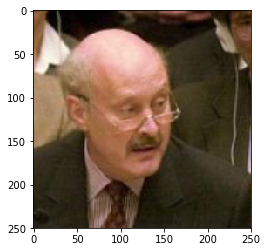

I see a human that looks like a Pharaoh hound!


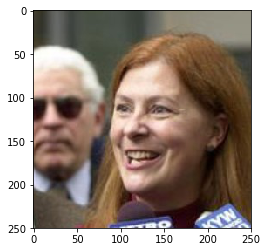

I see a human that looks like a Chinese crested!


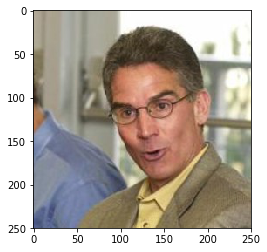

I see a human that looks like a Xoloitzcuintli!


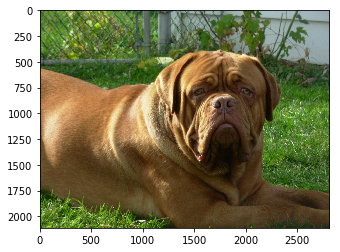

It looks like a Dogue de bordeaux!


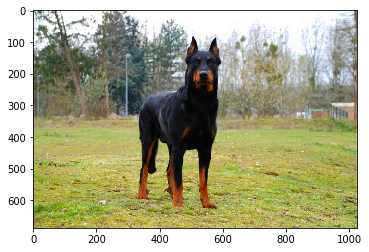

I see a human that looks like a German pinscher!


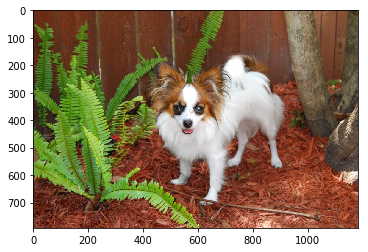

It looks like a Papillon!


In [214]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
def hrand():
    return random.randint(0, len(hum_files))

def drand():
    return random.randint(0, len(dog_files))

test_paths = [human_files[hrand()], human_files[hrand()], human_files[hrand()],
              dog_files[drand()], dog_files[drand()], dog_files[drand()]]

for file in test_paths:
    run_app(file)